In [1]:
%load_ext autoreload
%autoreload 2

### The Task
1. Learn neural eigenfunctions and corresponding eigenvalues with the provided dataloader `train_loader`
2. Recover the kernel $\kappa(\mathbf{x}_1, \mathbf{x}_2) = \frac{p(\mathbf{x}_1, \mathbf{x}_2)}{p(\mathbf{x}_1) p(\mathbf{x}_2)}$ with the learned eigenfunctions and eigenvalues, see the documentation for details.
3. Compare the learned kernel value with the ground-truth kernel value provided in `evaluate_tractable_kernel`
4. If this is successful, then we should further scale up our method.

In [37]:
import torch
from dataloader import prepare_dataloader
from dataloader.tractable_pair import get_distribution_and_samples
from model.kernel import evaluate_tractable_kernel

# get the probability density functions used to generate the toy data
px, pa, pb, pab, _, _, _, _ = get_distribution_and_samples(0)
# get the dataloader that produce the paired data
train_loader, test_loader = prepare_dataloader('tractable_pair', 2000, 2000, 2)


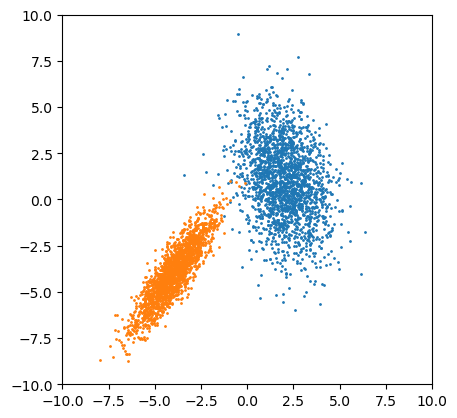

In [38]:
# visualize the paired data

import matplotlib.pyplot as plt
x, y = next(iter(train_loader))
x1, x2 = x
plt.scatter(x1[:, 0], x1[:, 1], s=1)
plt.scatter(x2[:, 0], x2[:, 1], s=1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

In [39]:
# the kernel value for paired data
print(evaluate_tractable_kernel(x1[:5], x2[:5], pa, pb, pab))
# the kernel value for unpaired data
print(evaluate_tractable_kernel(x1[:5], x2[5:10], pa, pb, pab))
# the kernel value for random data
print(evaluate_tractable_kernel(torch.randn((5,2)), torch.randn((5,2)), pa, pb, pab))

tensor([ 2.5108,  2.4508,  2.3071, 16.5872,  0.7779])
tensor([9.8857e-04, 4.7735e-01, 1.2679e+00, 9.5448e-11, 4.8385e-03])
tensor([7.5692e-30, 0.0000e+00, 0.0000e+00, 5.3924e-25, 9.1772e-04])
